 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [223]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [81]:
# Reading whale returns
csvpath = Path("C:/Users/defra/Bootcamp/Pandas Homework/whale_returns.csv")
whales_dataframe = pd.read_csv(csvpath)
whales_dataframe = whales_dataframe.set_index(pd.to_datetime(whales_dataframe["Date"], infer_datetime_format=True))
whales_dataframe = whales_dataframe.drop(columns=["Date"])
#whales_dataframe.shape
whales_dataframe.head()
#whales_dataframe.count

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [13]:
# Count nulls
whales_dataframe.isnull().mean()*100

Date                           0.00000
SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [15]:
# Drop nulls
whales_dataframe = whales_dataframe.dropna().copy()
whales_dataframe.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [96]:
# Reading algorithmic returns
csvpath = Path("C:/Users/defra/Bootcamp/Pandas Homework/algo_returns.csv")
#algorithmic_dataframe = pd.read_csv(csvpath)
#algorithmic_dataframe = algorithmic_dataframe.set_index(pd.to_datetime(algorithmic_dataframe["Date"], infer_datetime_format=True))
algorithmic_dataframe = pd.read_csv(csvpath, index_col="Date", parse_dates=True, infer_datetime_format=True)
#algorithmic_dataframe = algorithmic_dataframe.drop(columns=["Date"])
#algorithmic_dataframe.shape
algorithmic_dataframe.head(-10)
#algorithmic_dataframe.count


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-10,-0.004221,0.009632
2019-04-11,0.001705,-0.001568
2019-04-12,-0.005501,0.004504


In [97]:
# Count nulls
algorithmic_dataframe.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [98]:
# Drop nulls
algorithmic_dataframe = algorithmic_dataframe.dropna().copy()
algorithmic_dataframe.isnull().sum()
algorithmic_dataframe.head(-10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-10,-0.004221,0.009632
2019-04-11,0.001705,-0.001568
2019-04-12,-0.005501,0.004504


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [72]:
# Reading S&P TSX 60 Closing Prices
csvpath = Path("sp_tsx_history.csv")
tsx_dataframe = pd.read_csv(csvpath)
tsx_dataframe = tsx_dataframe.set_index(pd.to_datetime(tsx_dataframe["Date"], infer_datetime_format=True))
tsx_dataframe = tsx_dataframe.drop(columns=["Date"])
tsx_dataframe.head(10)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
2012-10-09,"$12,273.57"
2012-10-10,"$12,212.42"
2012-10-11,"$12,233.95"
2012-10-12,"$12,202.04"


In [73]:
# Check Data Types
tsx_dataframe.dtypes

Close    object
dtype: object

In [74]:
# Fix Data Types
tsx_dataframe["Close"] = tsx_dataframe["Close"].str.replace("$", "")
tsx_dataframe["Close"] = tsx_dataframe["Close"].str.replace(",", "")
tsx_dataframe["Close"] = tsx_dataframe["Close"].astype("float")
tsx_dataframe["Close"].dtype

dtype('float64')

In [319]:
# Calculate Daily Returns
daily_returns = tsx_dataframe.pct_change()
daily_returns.head(-10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-06,0.008428
2019-12-09,-0.002713
2019-12-10,-0.000009


In [91]:
# Drop nulls
daily_returns = daily_returns.dropna().copy()
daily_returns.isnull().sum()

Close    0
dtype: int64

In [352]:
# Rename `Close` Column to be specific to this portfolio.
new_column = ["TSX Return"]
daily_returns.columns = new_column
daily_returns.head()

#tsx_sub = daily_returns.loc['2018-01-03':'2019-12-12']
#tsx_sub.tail()

,TSX Return
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [318]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_df = pd.concat([whales_dataframe, algorithmic_dataframe, daily_returns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows
combined_df.head(-10)

#tsx_sub = combined_df.loc['2018-01-03':'2019-12-12']
#tsx_sub = tsx_sub.drop(columns=["SOROS FUND MANAGEMENT LLC", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "PAULSON & CO.INC. "])
#tsx_sub.head(-10)

,TSX Return
Date,
2018-01-03,0.003774
2018-01-04,0.002528
2018-01-05,-0.003869
2018-01-08,-0.001944
2018-01-09,0.000097
...,...
2019-04-10,0.003663
2019-04-11,0.000194
2019-04-12,0.004943


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

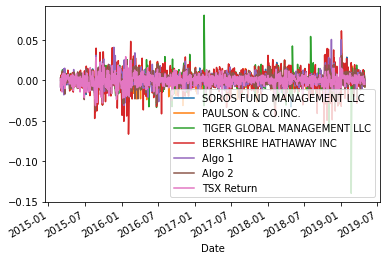

In [103]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

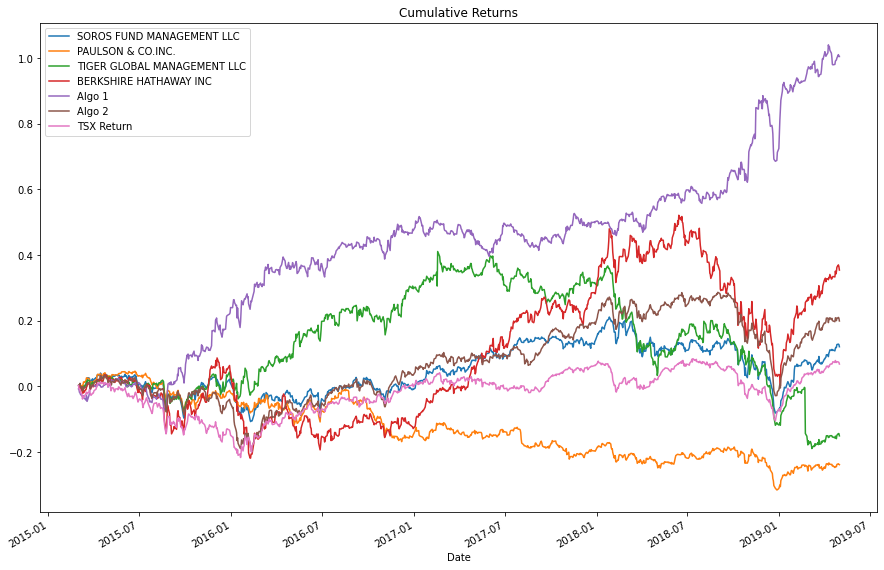

In [114]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_df).cumprod()-1
cumulative_returns.head(-10)
                       
# Plot cumulative returns
ax = cumulative_returns.plot(figsize=(15, 10), title="Cumulative Returns")
#cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


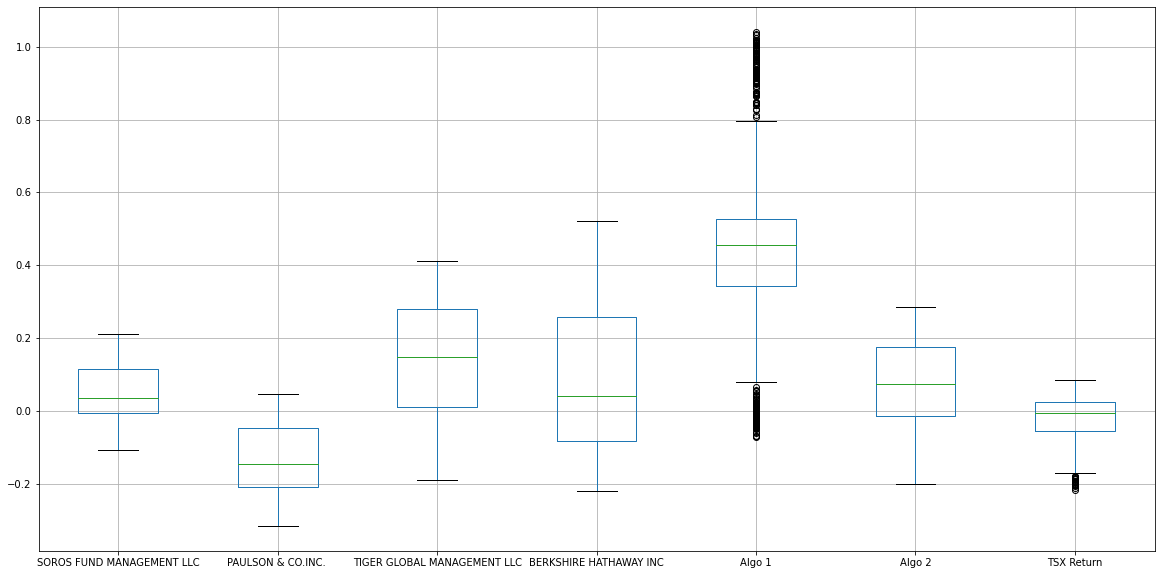

In [134]:
# Box plot to visually show risk
#cumulative_returns.boxplot()
boxax = cumulative_returns.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [131]:
# Calculate the daily standard deviations of all portfolios
sdev_daily = combined_df.std() 
sdev_daily.sort_values(inplace=True)
sdev_daily

PAULSON & CO.INC.              0.006982
TSX Return                     0.007031
Algo 1                         0.007590
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008323
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [128]:
# Calculate  the daily standard deviation of S&P TSX 60
#sdev_TSX = sdev_daily.get("TSX Return")
#for x in sdev_daily:
    #if x <= sdev_TSX:
        #print(f'{x} is lower risk than TSX 60')
    #else:
        #print(f'{x} has higher risk than TSX 60')
# Determine which portfolios are riskier than the S&P TSX 60
print("All but Paulson and CO are risker than the S&P TSX 60")

All but Paulson and CO are risker than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [132]:
# Calculate the annualized standard deviation (252 trading days)
sdev_annual = combined_df.std() * np.sqrt(252)
sdev_annual.sort_values(inplace=True)
sdev_annual

PAULSON & CO.INC.              0.110841
TSX Return                     0.111613
Algo 1                         0.120491
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132121
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

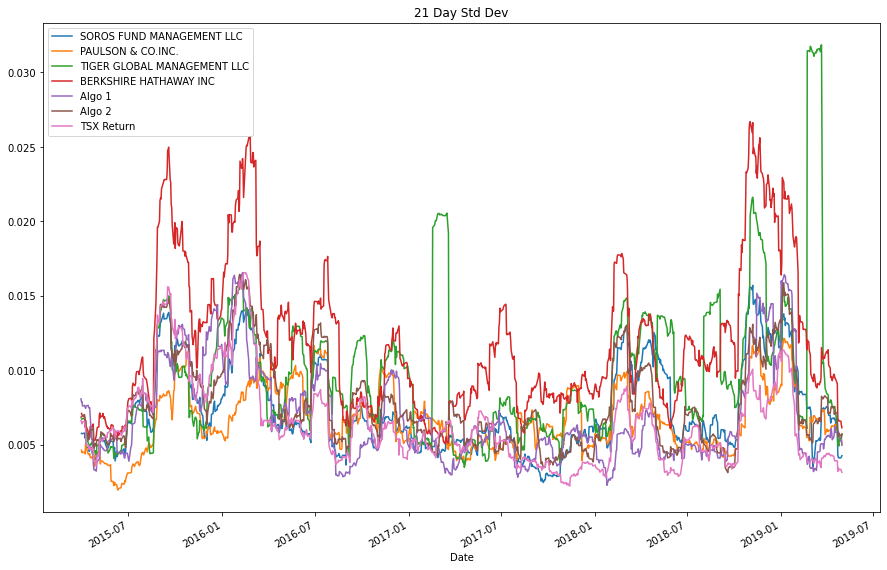

In [153]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
#combined_df.rolling(window=7).mean().plot()
std_21 = combined_df.rolling(window=21).std().plot(figsize=(15, 10), title="21 Day Std Dev")


### Calculate and plot the correlation

In [140]:
# Calculate the correlation
correlation = combined_df.corr()
correlation
# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX Return
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.284840,0.309759
Algo 2,0.826667,0.674015,0.506689,0.684609,0.284840,1.000000,0.737391
TSX Return,0.673930,0.486511,0.440583,0.557250,0.309759,0.737391,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

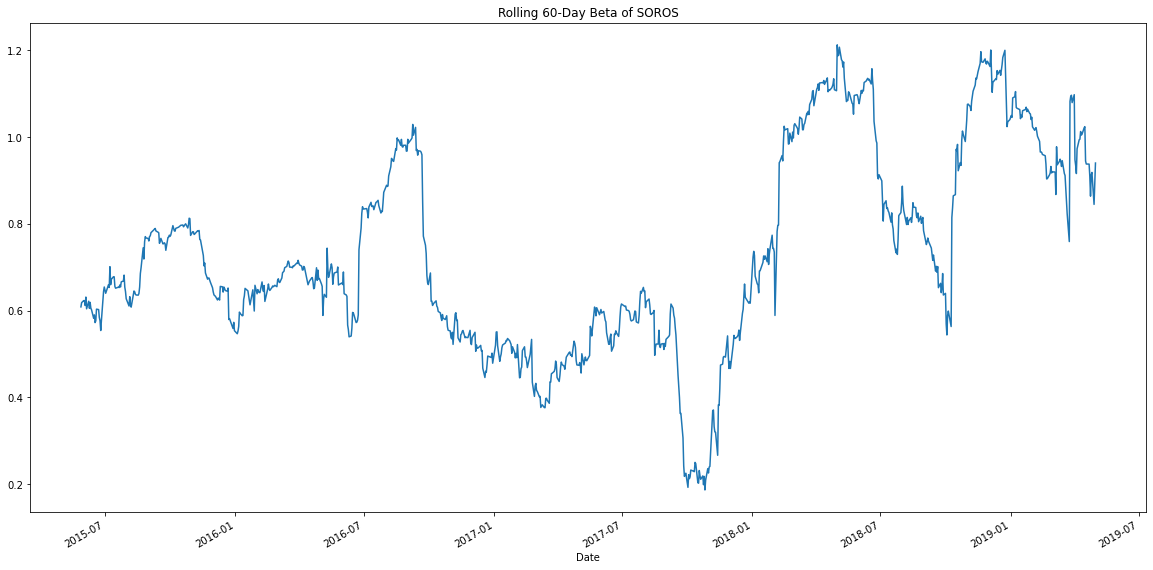

In [149]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['TSX Return'])
covariance
# Calculate variance of S&P TSX
variance = combined_df['TSX Return'].var()
variance
# Computing beta
soros_beta = covariance/variance
soros_beta
#Plot beta trend
rolling_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['TSX Return'])
rolling_variance = combined_df['TSX Return'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of SOROS')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [156]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX Return
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004999,0.001091,-0.003376
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.006235,0.001547,-0.003374
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.004849,0.002276,-0.002136
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004872,-0.000655,-0.003808
...,...,...,...,...,...,...,...
2019-04-25,0.001277,0.000032,-0.001058,0.001860,0.000625,0.000876,0.001018
2019-04-26,0.001500,0.000329,-0.000622,0.002138,0.000702,0.001018,0.001058
2019-04-29,0.001492,0.000406,-0.000399,0.002238,0.000848,0.001077,0.000998


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [158]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.473237
Algo 2                         0.402526
TSX Return                     0.199724
dtype: float64

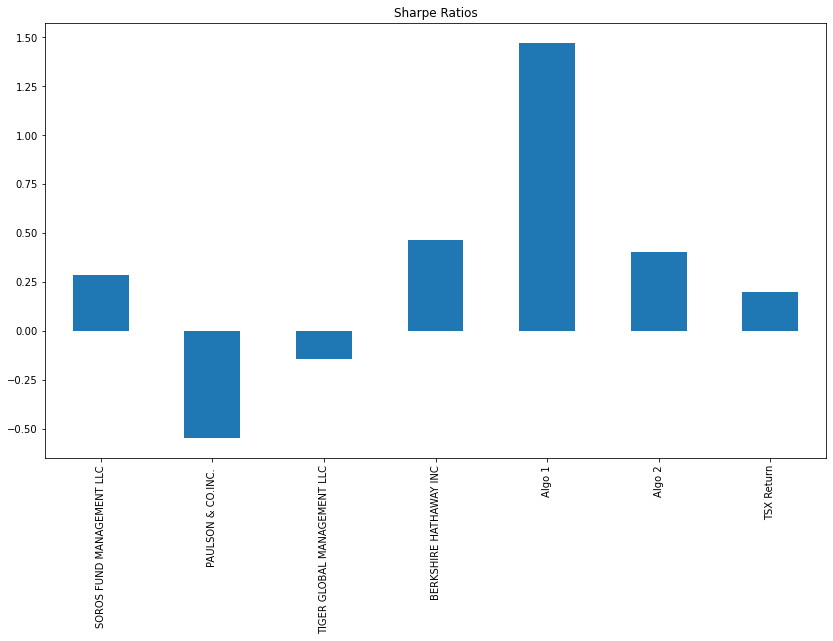

In [163]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(14, 8), title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

#Algo 1 outperforms all other portfolios.   Algo 2 outperforms the TSX, and 3 of 4 Whale portfolios.  It underperforms Berkshire Hathaway.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [357]:
# Reading data from 1st stock
csvpath = Path("shop_historical.csv")
shop_dataframe = pd.read_csv(csvpath, index_col="Date", parse_dates=True, infer_datetime_format=True)
#shop_dataframe.head(10)
shop_dataframe.isnull().mean()

Symbol    0.0
Close     0.0
dtype: float64

In [358]:
# Reading data from 2nd stock
csvpath = Path("otex_historical.csv")
otex_dataframe = pd.read_csv(csvpath, index_col="Date", parse_dates=True, infer_datetime_format=True)
#otex_dataframe.head(10)
otex_dataframe.isnull().mean()

Symbol    0.0
Close     0.0
dtype: float64

In [359]:
# Reading data from 3rd stock
csvpath = Path("l_historical.csv")
l_dataframe = pd.read_csv(csvpath, index_col="Date", parse_dates=True, infer_datetime_format=True)
#l_dataframe.head(-10)
l_dataframe.isnull().mean()

Symbol    0.0
Close     0.0
dtype: float64

In [360]:
# Combine all stocks in a single DataFrame
threestock_df = pd.concat([shop_dataframe, otex_dataframe, l_dataframe], axis="columns", join="inner")


In [361]:
# Reset Date index
threestock_df.sort_index(inplace=True)
threestock_df.tail(10)

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2019-12-13,SHOP,508.43,OTEX,56.91,L,69.25
2019-12-16,SHOP,517.42,OTEX,57.62,L,69.42
2019-12-17,SHOP,510.85,OTEX,57.54,L,69.30
2019-12-18,SHOP,520.56,OTEX,57.50,L,68.78
2019-12-19,SHOP,516.06,OTEX,57.28,L,67.66
2019-12-20,SHOP,513.22,OTEX,58.68,L,67.90
2019-12-23,SHOP,511.62,OTEX,57.89,L,67.68
2019-12-24,SHOP,525.39,OTEX,57.44,L,67.67
2019-12-27,SHOP,534.76,OTEX,57.70,L,67.78


In [362]:
# Reorganize portfolio data by having a column per symbol
new_columns = ["Symbol", "Shop Close", "Symbol", "Otex Close", "Symbol", "L Close"]
threestock_df.columns = new_columns
threestock_df = threestock_df.drop(columns=["Symbol"])
threestock_df.tail(10)

,Shop Close,Otex Close,L Close
Date,,,
2019-12-13,508.43,56.91,69.25
2019-12-16,517.42,57.62,69.42
2019-12-17,510.85,57.54,69.30
2019-12-18,520.56,57.50,68.78
2019-12-19,516.06,57.28,67.66
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67
2019-12-27,534.76,57.70,67.78


In [288]:
# Calculate daily returns
daily_three_returns = threestock_df.pct_change()
# Drop NAs
daily_three_returns = daily_three_returns.dropna().copy()
daily_three_returns.isnull().sum()
# Display sample data
daily_three_returns.head()

,Shop Close,Otex Close,L Close
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [363]:
# Set weights
weights = [1/3, 1/3, 1/3]


# Calculate portfolio return
portfolio_three_returns = daily_three_returns.dot(weights)
# Display sample data
portfolio_three_returns.tail()

Date
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [365]:
# Join your returns DataFrame to the original returns DataFrame
tsx_sub = daily_returns.loc['2018-01-03':'2019-12-30']
tsx_sub.head()

yetanother_df = pd.concat([tsx_sub, daily_three_returns, portfolio_three_returns], axis="columns", join="inner")
new_columns = ["TSX Returns", "Shop Returns", "Otex Returns", "L Returns", "Equal Returns"]
yetanother_df.columns = new_columns
#yetanother_df.head()
#yetanother_df.isnull().sum()
yetanother_df.tail()

,TSX Returns,Shop Returns,Otex Returns,L Returns,Equal Returns
Date,,,,,
2019-12-20,0.003188,-0.005503,0.024441,0.003547,0.007495
2019-12-23,0.000600,-0.003118,-0.013463,-0.003240,-0.006607
2019-12-24,0.003003,0.026915,-0.007773,-0.000148,0.006331
2019-12-27,-0.000695,0.017834,0.004526,0.001626,0.007995
2019-12-30,-0.004057,-0.031734,-0.008839,-0.006639,-0.015737


In [366]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Drop nulls

yetanother_df = yetanother_df.dropna().copy()
yetanother_df.isnull().sum()

TSX Returns      0
Shop Returns     0
Otex Returns     0
L Returns        0
Equal Returns    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [367]:
# Calculate the annualized `std`
stddev_annual = yetanother_df.std() * np.sqrt(252)
stddev_annual.sort_values(inplace=True)
stddev_annual

TSX Returns      0.090979
L Returns        0.152369
Otex Returns     0.215132
Equal Returns    0.216794
Shop Returns     0.488717
dtype: float64

### Calculate and plot rolling `std` with 21-day window

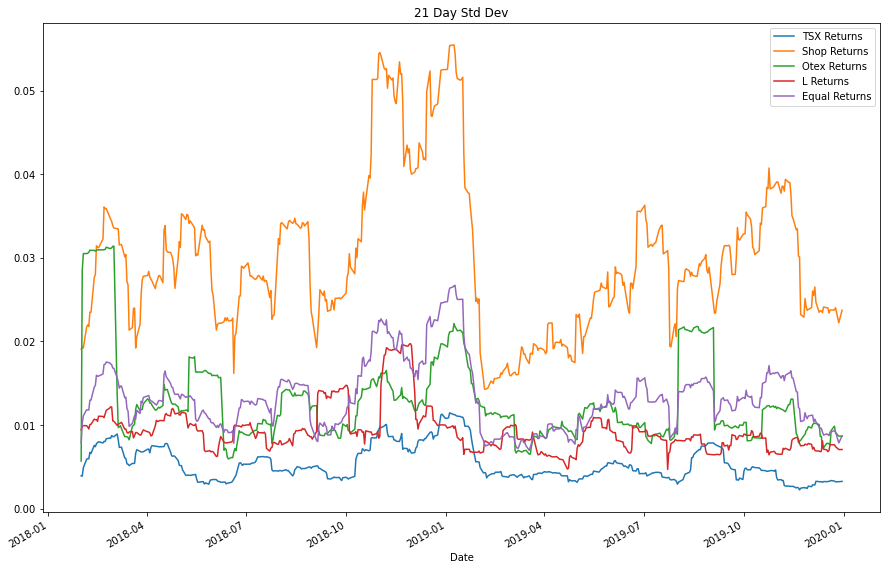

In [368]:
# Calculate rolling standard deviation
yetanother_df.rolling(window=21).std()
# Plot rolling standard deviation
stddev_21 = yetanother_df.rolling(window=21).std().plot(figsize=(15, 10), title="21 Day Std Dev")

### Calculate and plot the correlation

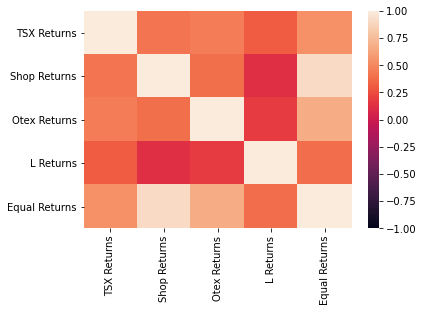

In [369]:
# Calculate and plot the correlation
yetanothercorrelation = yetanother_df.corr()
yetanothercorrelation
sns.heatmap(yetanothercorrelation, vmin=-1, vmax=1)

### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

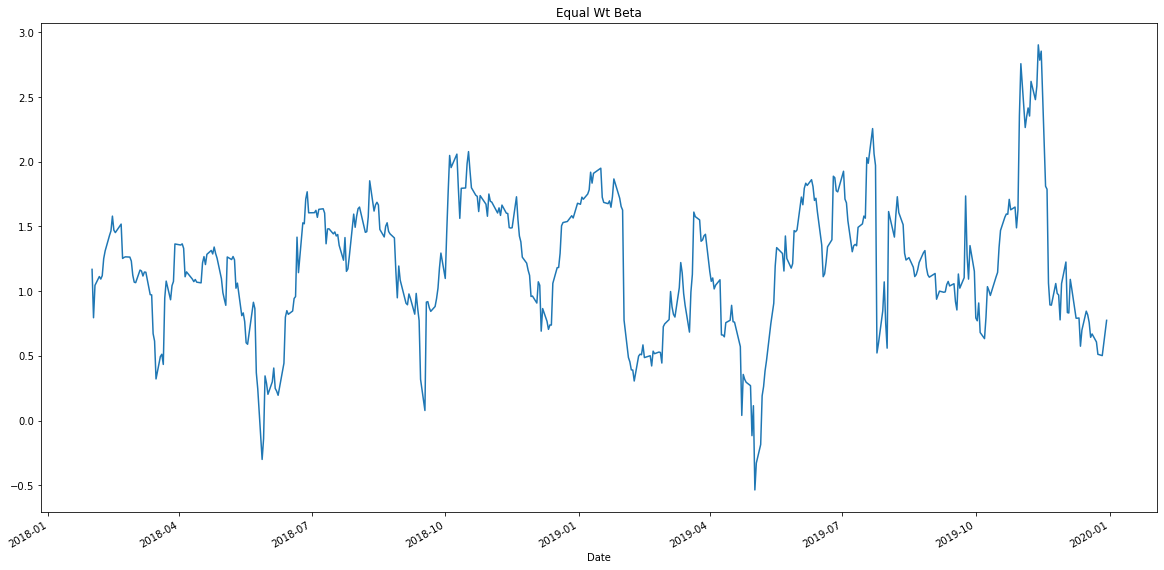

In [370]:
# Calculate and plot Beta
#covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['TSX Return'])
equalcovariance = yetanother_df["Equal Returns"].cov(yetanother_df['TSX Returns'])
equalcovariance
# Calculate variance of S&P TSX
equalvariance = yetanother_df['TSX Returns'].var()
equalvariance
equal_beta = equalcovariance/equalvariance
equal_beta
#equal_beta.plot(figsize=(14, 8), title='Equal Wt Beta')


rolling_equalcovariance = yetanother_df['Equal Returns'].rolling(window=21).cov(yetanother_df['TSX Returns'])
rolling_variance = yetanother_df['TSX Returns'].rolling(window=21).var()
rolling_equalbeta = rolling_equalcovariance / rolling_variance
rolling_equalbeta.plot(figsize=(20, 10), title='Equal Wt Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [371]:
# Calculate Annualzied Sharpe Ratios
newstocksharpe_ratios = (yetanother_df.mean() * 252) / (yetanother_df.std() * np.sqrt(252))
newstocksharpe_ratios

TSX Returns      0.307055
Shop Returns     1.655513
Otex Returns     0.743512
L Returns        0.570084
Equal Returns    1.623501
dtype: float64

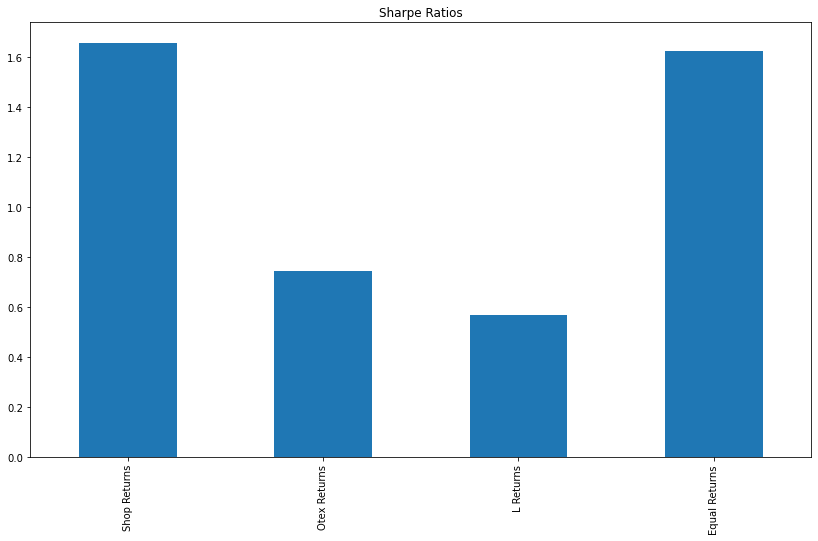

In [263]:
# Visualize the sharpe ratios as a bar plot
newstocksharpe_ratios.plot(kind="bar", figsize=(14, 8), title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
#The equal weight portfolio is a close second place to Shopify.